In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.style.use('seaborn-notebook')

In [2]:
def get_random(N, d):
    return d * (2 * np.random.random(N) - 1)

In [3]:
M = 30
X1 = xrange1 = np.linspace(0, 1, 2*M)
X2 = xrange2 = np.linspace(0, 1, 2*M)
X3 = xrange3 = np.linspace(0, 1, 2*M)
Y1 = 6*xrange1 + 1.1
Y2 = -6*xrange2 + 1.0
Y3 = 0.3*xrange3 + 0.9

Y1 += get_random(2*M, 0.2)
Y2 += get_random(2*M, 0.15)
Y3 += get_random(2*M, 0.1)

X1s = X1.reshape(-1,1)
X2s = X2.reshape(-1,1)
X3s = X3.reshape(-1,1)

X = np.hstack((X1, X2, X3))
Xs = X.reshape(-1,1)
Y = np.hstack((Y1, Y2, Y3))


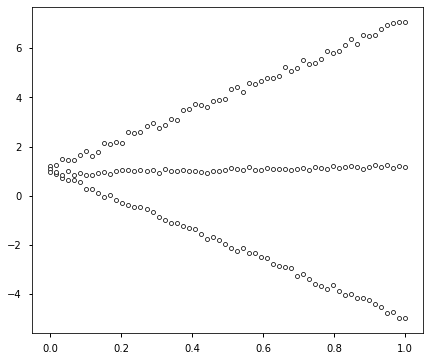

In [4]:
plt.figure(figsize=(7,6))
plt.scatter(X, Y, s=16, c='w', edgecolors='k', linewidth=0.75)
plt.show()

In [5]:
import mlgrad
import mlgrad.model as ml_model
import mlgrad.risk as ml_risk
import mlgrad.loss as ml_loss
import mlgrad.weights as ml_weights
import mlgrad.func as ml_func
import mlgrad.af as ml_af

In [6]:
# minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.Square()), 2, a=15)
minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.SoftAbs(0.001)), 3, a=15)

In [7]:
layer = ml_model.GeneralModelLayer(1)
linmod1 = ml_model.LinearModel(1)
linmod2 = ml_model.LinearModel(1)
linmod3 = ml_model.LinearModel(1)
layer.append(linmod1)
layer.append(linmod2)
layer.append(linmod3)
nn = ml_model.FFNetworkModel()
nn.add(layer)

nn.allocate()
nn.init_param()

In [8]:
risk = ml_risk.ER21(Xs, Y, nn, minloss)

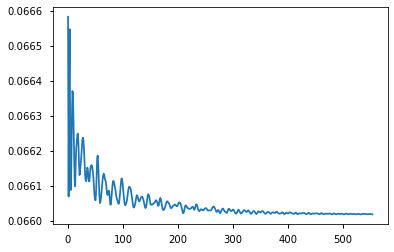

In [9]:
alg = mlgrad.erm_fg(risk, n_restart=5, h=0.01, tol=1.0e-9)

plt.plot(alg.lvals)
plt.show()

In [10]:
print(np.array(linmod1.param))
print(np.array(linmod2.param))
print(np.array(linmod3.param))
alg.K

[1.11689542 5.99257141]
[0.91191983 0.27402345]
[ 0.95420585 -5.8960992 ]


2552

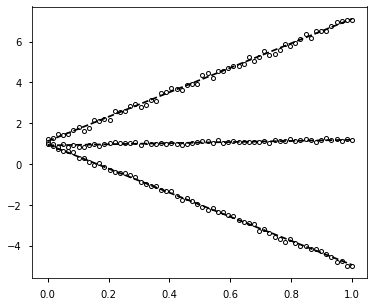

In [11]:
plt.figure(figsize=(6,5))
plt.scatter(X, Y, s=16, c='w', edgecolors='k', linewidth=1.0)
XX = np.array([X.min(), X.max()])
XXs = XX.reshape(-1,1)
plt.plot(XX, linmod1.evaluate_all(XXs), linestyle='--', color='k')
plt.plot(XX, linmod2.evaluate_all(XXs), linestyle='--', color='k')
plt.plot(XX, linmod3.evaluate_all(XXs), linestyle='--', color='k')
# plt.legend()
# plt.savefig('fig/kmeans_regression_edges.eps')
plt.show()

In [12]:
M2 = 20
X11 = 0.25 + get_random(M2, 0.25)
X22 = 0.25 + get_random(M2, 0.25)
X33 = -0.3 + get_random(M2, 0.2)
Y11 = 8 + get_random(M2, 2.)
Y22 = -6 + get_random(M2, 2.)
Y33 = 1.0 + get_random(M2, 2.)


X_rob = np.hstack((X1, X2, X3, X11, X22, X33))
Xs_rob = X_rob.reshape(-1,1)
Y_rob = np.hstack((Y1, Y2, Y3, Y11, Y22, Y33))

print(len(X)/len(X_rob))

0.75


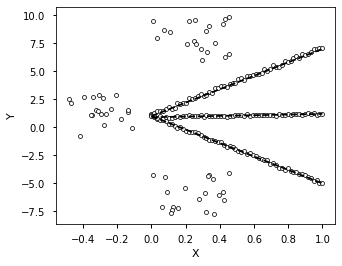

In [13]:
plt.figure(figsize=(5.0,4.0))
plt.scatter(X_rob, Y_rob, s=16, c='w', edgecolors='k', linewidth=0.75)
plt.plot([0,1], [1, 7], linestyle='--', color='k')
plt.plot([0,1], [0.9, 1.2], linestyle='--', color='k')
plt.plot([0,1], [1, -5], linestyle='--', color='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('fig/kmeans_regression_edges.eps')
plt.show()

In [14]:
layer = ml_model.GeneralModelLayer(1)
linmod1 = ml_model.LinearModel(1)
linmod2 = ml_model.LinearModel(1)
linmod3 = ml_model.LinearModel(1)
layer.append(linmod1)
layer.append(linmod2)
layer.append(linmod3)
nn = ml_model.FFNetworkModel()
nn.add(layer)

nn.allocate()
nn.init_param()

In [15]:
risk = ml_risk.ER21(Xs_rob, Y_rob, nn, minloss)

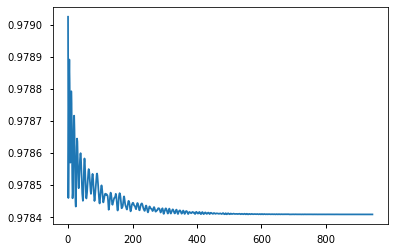

In [16]:
alg = mlgrad.erm_fg(risk, n_restart=5, h=0.01, tol=1.0e-9)

plt.plot(alg.lvals)
plt.show()

In [17]:
print(np.array(linmod1.param))
print(np.array(linmod2.param))
print(np.array(linmod3.param))
alg.K

[0.94976068 0.2146298 ]
[-5.26978227  1.87753009]
[3.62775095 2.80420195]


2942

In [18]:
layer_rob = ml_model.GeneralModelLayer(1)
linmod1_rob = ml_model.LinearModel(1)
linmod2_rob = ml_model.LinearModel(1)
linmod3_rob = ml_model.LinearModel(1)
layer_rob.append(linmod1_rob)
layer_rob.append(linmod2_rob)
layer_rob.append(linmod3_rob)
nn_rob = ml_model.FFNetworkModel()
nn_rob.add(layer_rob)

nn_rob.allocate()
nn_rob.init_param()

In [19]:
risk_rob = ml_risk.ER21(Xs_rob, Y_rob, nn_rob, minloss)
agg_func = ml_af.averaging_function("WM", alpha=0.75)
weights = ml_weights.MWeights(agg_func, risk_rob)

0.09425452558781207


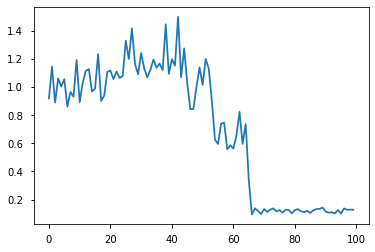

In [20]:
fg_rob = mlgrad.fg(risk_rob, h=0.01, tol=1.0e-9)
alg_rob = mlgrad.erm_irgd(fg_rob, weights)

plt.plot(alg_rob.lvals)
plt.show()

In [21]:
print(np.array(linmod1_rob.param))
print(np.array(linmod2_rob.param))
print(np.array(linmod3_rob.param))
alg_rob.K

[ 0.93378857 -5.86796726]
[0.87753738 0.32226826]
[1.12959589 5.97897052]


100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


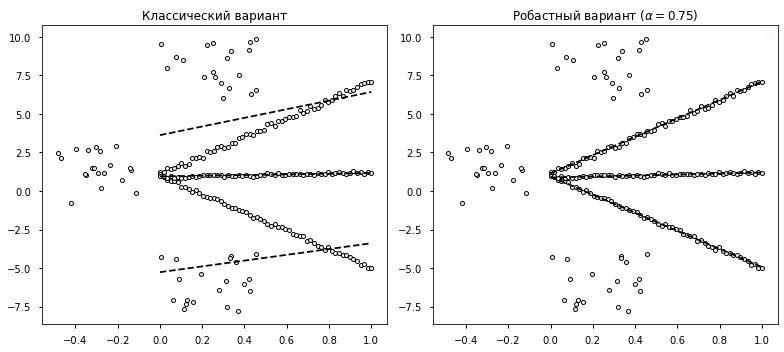

In [22]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.title(r'Классический вариант')
plt.scatter(X_rob, Y_rob, s=16, c='w', edgecolors='k', linewidth=1.0)
XX = np.array([0., 1.])
XXs = XX.reshape(-1,1)
plt.plot(XX, linmod1.evaluate_all(XXs), color='k', linestyle='--')
plt.plot(XX, linmod2.evaluate_all(XXs), color='k', linestyle='--')
plt.plot(XX, linmod3.evaluate_all(XXs), color='k', linestyle='--')
plt.subplot(1,2,2)
plt.title(r'Робастный вариант ($\alpha=0.75$)')
plt.scatter(X_rob, Y_rob, s=16, c='w', edgecolors='k', linewidth=1.0)
XX = np.array([0., 1.])
XXs = XX.reshape(-1,1)
plt.plot(XX, linmod1_rob.evaluate_all(XXs), color='k', linestyle='--')
plt.plot(XX, linmod2_rob.evaluate_all(XXs), color='k', linestyle='--')
plt.plot(XX, linmod3_rob.evaluate_all(XXs), color='k', linestyle='--')
plt.legend()
plt.tight_layout()
plt.savefig('robust_kmeans_regression_test_2.eps')
plt.show()

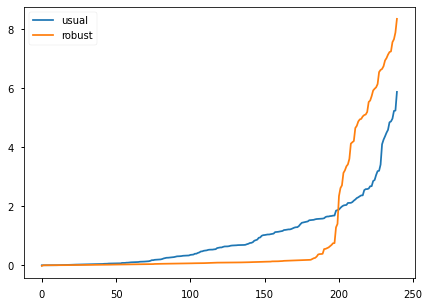

In [23]:
plt.figure(figsize=(7,5))
plt.plot(sorted(risk.evaluate_losses()), label='usual') #, marker='s', markersize=4)
plt.plot(sorted(risk_rob.evaluate_losses()), label='robust') #, marker='s', markersize=4)
# plt.savefig('fig/tonedata_scatter_2.eps')
plt.legend()
plt.show()